
* evtl. noch quick and dirty Auswertungen mit groupby und df.plot
* groupby auf datetime nutzen
* um dann im nächsten Notebook noch schöner zu plotten



* Auswertungen machen und Visualisierungen in neuen Notebooks in neuem Kapitel
* nach Monaten
* nach Receivern

=> und dann in schön!

# Explorative Datenanalyse

*Know your data!* Wichtig bei der Arbeit mit Daten ist es, diese gut zu kennen. Pandas ist dabei äußerst hilfreich, um mit wenig Code erste Einsichten in seine Daten zu bekommen. Daher werden im folgenden Abschnitt einige Herangehensweisen vorgestellt, wie mit pandas Daten erkundet werden können. 

In [2]:
import pandas as pd

Am Anfang steht das Einlesen der Daten - und die Umwandlung der Datentypen in das richtige Format. Wir lesen diesmal die JSON-Datei ein und wandeln die dort enthaltene unix-Zeit in ein Datetime-Objekt um.

In [3]:
df = pd.read_json('240301-AvH-letters-with-tokens.json')
df.loc[:, 'date'] = pd.to_datetime(df.loc[:, 'date'], unit='ms')

In [4]:
print(df.shape)
df.head()

(296, 12)


,reference,edition_id,sender_id,sender,receiver_id,receiver,date,place_id,place,text,token,nr_token
0,https://edition-humboldt.de/H0002655,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1793-12-05,http://sws.geonames.org/6556797,Berg,"Berg , den 5 . Dez Dezember 1793 Ihr Brief, li...","[berg, den, 5, dez, dezember, 1793, ihr, brief...",252
1,https://edition-humboldt.de/H0002730,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1794-02-06,http://sws.geonames.org/2951825,Bayreuth,"Der Ueberbringer dieses Briefchens, lieber Soe...","[der, ueberbringer, dieses, briefchens, lieber...",143
2,https://edition-humboldt.de/H0002729,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-07,http://sws.geonames.org/2951825,Bayreuth,"Verehrungswerther Freund, Ich will Ihnen ein B...","[verehrungswerther, freund, ich, will, ihnen, ...",591
3,https://edition-humboldt.de/H0002657,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/118805193,Samuel Thomas von Soemmerring,1795-06-29,http://sws.geonames.org/2919290,Goldkronach,"Wie innig, theurer, Verehrungswerther Mann! fr...","[wie, innig, theurer, verehrungswerther, mann,...",899
4,https://edition-humboldt.de/H0001183,#AVHR,http://d-nb.info/gnd/118554700,Alexander von Humboldt,http://d-nb.info/gnd/117387436,Karl Ludwig Willdenow,1795-07-17,http://sws.geonames.org/2951825,Bayreuth,"ich reise noch heute von hier nach Venedig , d...","[ich, reise, noch, heute, von, hier, nach, ven...",143


## Infos zum Dataframe

Schauen wir uns die Titel der Spalten an:

In [6]:
df.columns

Index(['reference', 'edition_id', 'sender_id', 'sender', 'receiver_id',
       'receiver', 'date', 'place_id', 'place', 'text', 'token', 'nr_token'],
      dtype='object')

Und dann geben wir Infos zu allen Spalten ausgeben, um Angaben zu den Datentypen zu erhalten. Bis auf zwei Spalten ist der Datentype als 'object' ausgewiesen. D.h. hier sind strings in den Spalten vorhanden. Bei `date` haben wir ein Datetime-Objekt erstellt, bei `nr_token` handelt es sich um integers. Auch die Angabe über fehlende Werte ist ersichtlich, die wir aber in der darauffolgenden Zelle nochmal einfacher darstellen lassen können.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   reference    296 non-null    object        
 1   edition_id   296 non-null    object        
 2   sender_id    296 non-null    object        
 3   sender       296 non-null    object        
 4   receiver_id  296 non-null    object        
 5   receiver     296 non-null    object        
 6   date         296 non-null    datetime64[ns]
 7   place_id     283 non-null    object        
 8   place        82 non-null     object        
 9   text         296 non-null    object        
 10  token        296 non-null    object        
 11  nr_token     296 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 30.1+ KB


In [9]:
df.isna().sum()

reference        0
edition_id       0
sender_id        0
sender           0
receiver_id      0
receiver         0
date             0
place_id        13
place          214
text             0
token            0
nr_token         0
dtype: int64

Zu den Spalten mit numerischen Werten können wir Informationen über die Verteilung der Daten aufrufen. In unserem Beispiel haben wir allerdings nur eine Spalte mit numerischen Werten, die Auskunft über die Anzahl der Token in den Briefen gibt. Im Durchschnitt besteht ein Brief aus 388 Token, während der längste Brief 4347 Token umfasst.

In [10]:
df.describe()

,nr_token
count,296.000000
mean,388.266892
std,474.315521
min,0.000000
25%,124.750000
50%,224.500000
75%,484.750000
max,4347.000000


## Infos zu einzelnen Spalten

Mit `nunique()` können wir die Anzahl der einmalig auftretenden Werte ausgeben, mit `unique()` können wir die Wert selbst aufrufen. Dies führen wir für die Spalten `edition_id`, `sender`, `receiver` und `place` mit Hilfe einer for-Schleife durch.

In [14]:
for col in ['edition_id', 'sender', 'receiver', 'place']:

    print(col)
    print(df.loc[:, col].nunique())
    print(df.loc[:, col].unique())
    print('###\n')

edition_id
1
['#AVHR']
###

sender
14
['Alexander von Humboldt' 'Aimé Bonpland' 'Aylmer Bourke Lambert'
 'George Arnott Walker-Arnott' 'Johann Moritz Rugendas'
 'Christian Gottfried Ehrenberg' 'Carl Sigismund Kunth'
 'Sir Robert Hermann Schomburgk' 'Moritz Richard Schomburgk'
 'Joseph Dalton Hooker' 'Otto Alfred Schomburgk'
 'Hermann Schlagintweit-Sakünlünski' 'Adolph von Schlagintweit'
 'Robert, Freiherr von Schlagintweit']
###

receiver
18
['Samuel Thomas von Soemmerring' 'Karl Ludwig Willdenow'
 'Dietrich Ludwig Gustav Karsten' 'Carl Sigismund Kunth'
 'Christian Gottfried Ehrenberg' 'Alexander von Humboldt'
 'Johann Moritz Rugendas' 'Karl Christian Gmelin'
 'Franz Julius Ferdinand Meyen' 'Adolphe Graf von Polier'
 'Karl Friedrich Schinkel' 'Friedrich Wilhelm IV., König von Preußen'
 'Joseph Dalton Hooker' 'Sir Robert Hermann Schomburgk'
 'Otto Alfred Schomburgk' 'Adolph von Schlagintweit'
 'Hermann Schlagintweit-Sakünlünski' 'Robert, Freiherr von Schlagintweit']
###

place
27
['Berg

## Schnelle Visualisierungen

Mit pandas können wir schnell auch erste Visualisierungen plotten. 

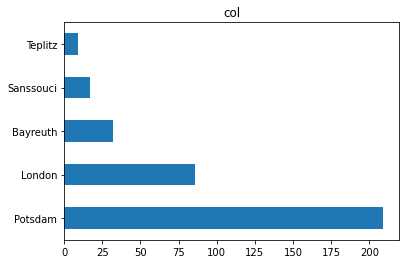

In [19]:
# for col in ['sender', 'receiver', 'place']:

#     top = df.loc[:, col].value_counts()

#     top.head(5).plot(kind='barh', title='col');

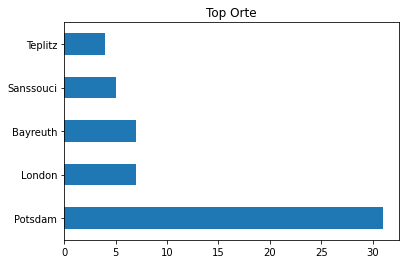

In [17]:
top_places = df.loc[:, 'place'].value_counts()

top_places.head(5).plot(kind='barh', title='Top Orte');

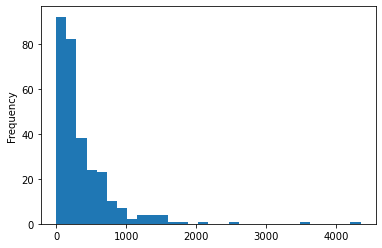

In [23]:
df.loc[:, 'nr_token' ].plot(kind='hist', bins=30);